In [1]:
import sys

sys.path.append('/Users/7jiang/miniforge3/envs/coding3/lib/python3.9/site-packages/cv2')

In [2]:
!pip install mediapipe

import numpy as np
import cv2

import mediapipe as mp

import socket
import time

In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install python-osc

Note: you may need to restart the kernel to use updated packages.


In [5]:
# check OpenCV, and display OpenCV version
cv2.__version__

'4.8.1'

In [6]:
# import libraries
import cv2
from matplotlib import pyplot as plt

In [7]:
# check OpenCV, and display OpenCV version
cv2.__version__

'4.8.1'

In [8]:
# init camera
camera = cv2.VideoCapture(0)

In [9]:
# Grab a single frame of video
ret, frame = camera.read()

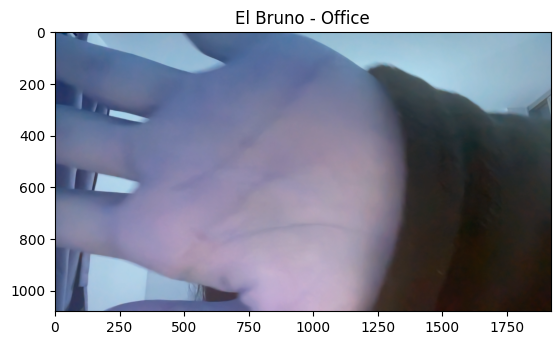

In [10]:
# show camera frame
plt.imshow(frame)
plt.title('El Bruno - Office')
plt.show()

In [ ]:
import cv2
import mediapipe as mp
from pythonosc import udp_client
import socket
import time

# ----- OSC Initialization -----
client = udp_client.SimpleUDPClient("127.0.0.1", 12345)

# ----- UDP Initialization -----
UDP_IP = "127.0.0.1"
UDP_PORT = 5065
sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)

# ----- MediaPipe Pose Initialization -----
mpPose = mp.solutions.pose
pose = mpPose.Pose()
mpDraw = mp.solutions.drawing_utils

# ----- Video Capture Initialization -----
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Unable to open camera. Exiting.")
    exit()

while True:
    success, img = cap.read()
    if not success:
        print("Failed to capture frame. Exiting.")
        break

    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = pose.process(imgRGB)

    if results.pose_landmarks:
        mpDraw.draw_landmarks(img, results.pose_landmarks, mpPose.POSE_CONNECTIONS)

        # Send OSC messages
        nose = results.pose_landmarks.landmark[0]
        client.send_message("/pose/landmark", [nose.x, nose.y, nose.z])
        client.send_message("/person/detected", 1)

        # Send UDP message for landmark 19
        landmark19 = results.pose_landmarks.landmark[19]
        b2 = bytes(str(landmark19), encoding='utf-8')
        sock.sendto(b2, (UDP_IP, UDP_PORT))
        
    else:
        client.send_message("/person/detected", 0)

    # Display FPS on the window
    cTime = time.time()
    fps = 1 / (cTime - 0)
    cv2.putText(img, str(int(fps)), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
    
    cv2.imshow("Pose Tracking", img)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
